In [ ]:
import os
print(os.listdir())

['.config', 'loan_data.csv', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("loan_data.csv")
print("Shape:", df.shape)
df.head()
df.info()

Shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Marital_Status        10000 non-null  object 
 3   Number_of_Dependents  10000 non-null  object 
 4   Education             10000 non-null  object 
 5   Loan_Status           10000 non-null  object 
 6   Annual_Income         9000 non-null   float64
 7   Credit_Score          8979 non-null   float64
 8   Loan_Amount           8987 non-null   float64
 9   Term                  10000 non-null  int64  
 10  Property_Area         10000 non-null  object 
 11  Loan_Approval         10000 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 937.6+ KB


In [ ]:
print(df.isnull().sum())

Customer_ID                0
Gender                     0
Marital_Status             0
Number_of_Dependents       0
Education                  0
Loan_Status                0
Annual_Income           1000
Credit_Score            1021
Loan_Amount             1013
Term                       0
Property_Area              0
Loan_Approval              0
dtype: int64


In [ ]:
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].median())


print(df.isnull().sum())

Customer_ID             0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education               0
Loan_Status             0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Term                    0
Property_Area           0
Loan_Approval           0
dtype: int64


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#detect target column
target_col = "Loan_Status"
y = df[target_col]

#map Y/N to 1/0
if y.dtype == object:
    y = y.str.strip().map({'Y': 1, 'N': 0, 'Yes': 1, 'No': 0})

# Handle missing data in numerical columns of df
for col in ['Annual_Income', 'Credit_Score', 'Loan_Amount']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

#defining features
X = df.drop([target_col, 'Customer_ID', 'Loan_Approval'], axis=1)

print("Missing values in X after imputation and dropping columns:")
print(X.isnull().sum())

#converting categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

print("Missing values in X:")
print(X.isnull().sum())

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

Missing values in X after imputation and dropping columns:
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education               0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Term                    0
Property_Area           0
dtype: int64
Missing values in X:
Annual_Income              0
Credit_Score               0
Loan_Amount                0
Term                       0
Gender_Male                0
Marital_Status_Yes         0
Number_of_Dependents_1     0
Number_of_Dependents_2     0
Number_of_Dependents_3+    0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5265
Confusion Matrix:
 [[519 487]
 [460 534]]


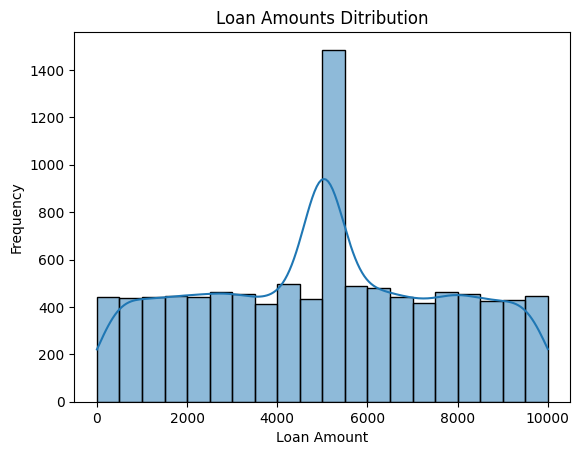

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Loan_Amount'], bins=20, kde=True)
plt.title('Loan Amounts Ditribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

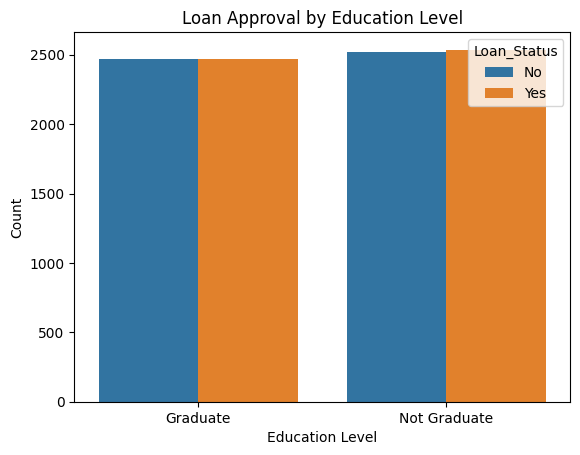

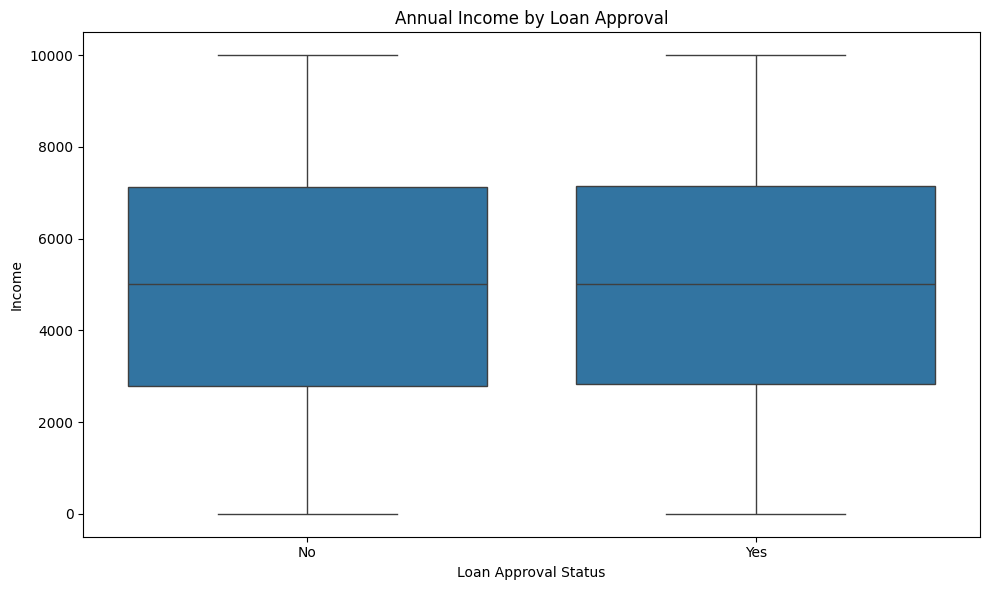

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Approval by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df)
plt.title('Annual Income by Loan Approval')
plt.xlabel('Loan Approval Status')
plt.ylabel('Income')
plt.tight_layout()
plt.show()
